#Assignment 1: Build FeedForward Neural Network Architecture 

The goal of this assignment is twofold: (i) implement and use gradient descent (and its variants) with
backpropagation for a classification task (ii) get familiar with wandb which is a cool tool for running and keeping track of a large number of experiments

### Import required packages

In [1]:
from keras.datasets import fashion_mnist
from sklearn import metrics
import random
from keras.datasets import mnist
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib.colors
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
import plotly.express as px
from sklearn.metrics import log_loss
import pandas as pd
import numpy as np
 
 
 



ModuleNotFoundError: No module named 'keras'

### Installing and Login to Wandb

In [ ]:
!pip install wandb -qqq
import wandb
wandb.login(key = "13ebf1b4a6b39617b6456bf8f57f55bb361759b2")

wandb: Currently logged in as: cs22m035. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
labels = ["T-shirt/Top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]
print(labels)

['T-shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']


In [ ]:
# checking details of dataset
print(train_images.shape)
print(len(train_images))
print(len(train_labels))
print(train_labels)

(60000, 28, 28)
60000
60000
[9 0 0 ... 3 0 5]


In [ ]:
N , a , b = train_images.shape
#Dimesion of each Datapoint will be a*b
print(N,a,b)
x = a*b
d = x
nl = len(labels)

60000 28 28


In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

c = list(zip(train_images, train_labels))
random.shuffle(c)

labels = ["T-shirt/Top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]
N , a , b = train_images.shape

train_images, train_labels = zip(*c)
train_images = np.array(train_images) 
train_labels = np.array(train_labels)

In [ ]:
# wandb.init(project="Assignment 1",name="Question 1")

#Question 1
Download the fashion-MNIST dataset and plot 1 sample image for each class as shown in the grid below. Use from keras.datasets import fashion_mnist for getting the fashion mnist dataset.

In [ ]:
def show_images(train_images , train_labels , desc):
  
    fig, axs = plt.subplots(2, 5, figsize=(12, 6))
    axs = axs.flatten()
    class_images=[]

    for i in range(10):
          index=np.argmax(train_labels==i)
          # Plot the image
          axs[i].imshow(train_images[index], cmap='gray')
          axs[i].set_title(labels[i])
          axs[i].axis('off')
          image = wandb.Image(train_images[index], caption=labels[i])
          class_images.append(image)

    wandb.log({"examples": class_images})
    
    plt.show()


# Question 2 (10 Marks)
Implement a feedforward neural network which takes images from the fashion-mnist data as input and outputs a probability distribution over the 10 classes.

Your code should be flexible such that it is easy to change the number of hidden layers and the number of neurons in each hidden layer.

###Propecessing of data



In [ ]:
#Flattening we are converting the 28*28 data point as 784*1 data point
print(train_images.shape)

flattened_images = []
for i in range(len(train_images)):
    flattened_image = train_images[i].flatten()
    flattened_images.append(flattened_image)
flatted_train_images = np.array(flattened_images)

print("Shape of flattened_train_images is : ",flatted_train_images.shape)

  
#Same transition for testdata
flattened_images = []
for i in range(len(test_images)):
    flattened_image = test_images[i].flatten()
    flattened_images.append(flattened_image)
flatted_test_images = np.array(flattened_images)
print("Shape of flattened_test_images is  : ",flatted_test_images.shape)
     

(60000, 28, 28)
Shape of flattened_train_images is :  (60000, 784)
Shape of flattened_test_images is  :  (10000, 784)


In [ ]:
#getting train data and validation data from training data
from sklearn.model_selection import train_test_split
train_x, valid_x, cat_train_y, cat_val_y = train_test_split(flatted_train_images, train_labels, test_size=0.1, stratify = train_labels ,random_state=42)

In [ ]:
#One hot encoding of categorical labels 
def encode(data, nl):
    encode_data = np.zeros((len(data), nl))
    for i in range(len(data)):
        actual_label = data[i]
        encode_data[i][actual_label] = 1
    return encode_data


#One hot ecoding 
train_y = encode(cat_train_y , nl)
print(train_y.shape)
valid_y = encode(cat_val_y , nl)
print(valid_y.shape)
test_y = encode(test_labels , nl)
print(test_y.shape)


(54000, 10)
(6000, 10)
(10000, 10)


In [ ]:
#Normalizing the data
mean = np.mean(train_x , axis = 0)
train_x = (train_x - mean) /255
test_x = (flatted_test_images - mean)/255
valid_x = (valid_x - mean)/255


#Activation functions


In [ ]:

#Sigmoid 
 
def sigmoid(x):
    temp = []
    # exp_xi=[]
    for i in range(len(x)):
        # exp_xi=np.exp(-float(x[i]))
        result = (1/(1 + np.exp(-(float(x[i])))))
        temp.append(result)
    return np.array(temp)
#Tanh
def tanh(x):
    temp = []
    for i in range(len(x)):
      result=np.tanh(x[i])
      temp.append(result)

    return np.array(temp)
#ReLU
def relu(x):
    temp = []
    for i in range(len(x)):
      if x[i]>0:
        temp.append(x[i])
      elif x[i]<=0:
        temp.append(0)
    return np.array(temp)
    
#Softmax
def softmax(x):
  
  sum=0
  for i in range(len(x)):
    sum+=np.exp(float(x[i]))
  temp=[]  
  for i in range(len(x)):
    result=np.exp(float(x[i]))
    temp.append(result/sum)

  return np.array(temp)

#Derivative of Sigmoid
def derivative_sigmoid(x):
    temp=x*(1 - x)
    return temp

#Derivative of Tanh
def derivative_tanh(x):
    cal_tanh=1-np.square(x)
    return cal_tanh

#Derivative of ReLU
def derivative_relu(x):
    temp = []
    sum=0
    for i in range(len(x)):
      if x[i]<=0:
        temp.append(0)
      elif x[i]>0:
        temp.append(1)
    return np.array(temp)

#Network initialization

In [ ]:
 
def intitialize_zero_input(dim, hl, ol,w,b,d):

    for i in range(len(hl)):
        hl_size=hl[i]
        b.append(np.zeros(hl_size))
       
        if i == 0:
            
            w.append(np.zeros((hl_size, d)))
        else:
            lst_size=hl[i-1]
            w.append(np.zeros((hl_size,lst_size )))
    return w,b

def initialize_zero_output(im, hl, ol,w,b,d):

    for i in range(len(ol)):
        ol_size=ol[i]
        b.append(np.zeros(ol_size))
        w.append(np.zeros((ol_size, hl[-1])))
    return w,b


def initialize_zeros(dim, hl, ol):
    w = [np.array([])]
    b = [np.array([])]
    d = dim
  
    w,b=intitialize_zero_input(dim, hl, ol,w,b,d)
    w,b=initialize_zero_output(dim, hl, ol,w,b,d)

    return w, b


### Random Initialization And Xavier Initialization


In [ ]:
def intitialize_random_input(dim, hl, ol,W,b,d):
    np.random.seed(2)

    for i in range(len(hl)):
        hd_size=hl[i]
        b.append(np.random.randn(hd_size))
        if(i == 0):
          W.append(np.random.randn(hd_size,dim))
        else:
          lst_size=hl[i - 1]
          W.append(np.random.randn(hd_size,lst_size))

    return W,b

def initialize_random_output(im, hl, ol,W,b,d):

    np.random.seed(2)
    for i in range(len(ol)):
        ol_size=ol[i]
        lst_hl_size=hl[-1]
        b.append(np.random.randn(ol_size))
        W.append(np.random.randn(ol_size,lst_hl_size))
    return W,b

def random_initialization(dim, hl, ol,W,b,d):
   
  
    W,b=intitialize_random_input(dim, hl, ol,W,b,d)
    W,b=initialize_random_output(dim, hl, ol,W,b,d)

    return W,b

def intitialize_xavier_input(dim, hl, ol,W,b,d):
    np.random.seed(2)

    for i in range(len(hl)):
        hl_size=hl[i]
        b.append( np.random.randn(hl_size))
        if (i == 0):
            W.append(np.random.randn(hl_size,dim ) * np.sqrt(1/dim))
        else:
            lst_hd_size=hl[i-1]
            W.append(np.random.randn(hl_size,lst_hd_size) * np.sqrt(1/lst_hd_size))
    return W,b     

def initialize_xavier_output(im, hl, ol,W,b,d):
    np.random.seed(2)
    for i in range(len(ol)):
        ol_size=ol[i]
        b.append(np.random.randn(ol_size))
        lst_ol=hl[-1]
        W.append(np.random.randn(ol_size, lst_ol)* np.sqrt(1/lst_ol))
    return W,b

def xavier_initialization(dim, hl, ol,W,b,d):
   
  
    W,b=intitialize_xavier_input(dim, hl, ol,W,b,d)
    W,b=initialize_xavier_output(dim, hl, ol,W,b,d)

    return  W,b

#Initialize Network 
def initialize_network(dim, hl, ol, method):
  np.random.seed(2)
  # Declaring 2d numpy array
  W = [np.array([])]
  b = [np.array([])]
 
  d = dim
  #Setting up the random seed
  

  #Random Intialization
  if(method=='random'):
     W,b=random_initialization(dim,hl,ol,W,b,d)
      
  #Xavier Initialization
  else:
     W,b= xavier_initialization(dim,hl,ol,W,b,d)

  return W,b

 

#Forward Propagation

In [ ]:
 

def sigmoid_method(w,b,x,a,c,d,h):
  num_layers = (len(w)-1)
  for i in range(1 , num_layers):
            wh=np.dot( w[i], h[i-1] )
            c = wh + b[i]
            a.append(c)
            d = sigmoid(c)
            h.append(d)
def tanh_method(w,b,x,a,c,d,h):
  num_layers = (len(w)-1)
  for i in range(1 , num_layers):
            c = (w[i]@h[i-1])+b[i]
            a.append(c)
            h.append(tanh(c))
            
def identity_method(w,b,x,a,c,d,h):
  num_layers = (len(w)-1)
  for i in range(1 , num_layers):
            c = (w[i]@h[i-1])+b[i]
            a.append(c)
            h.append(c)


def relu_method(w,b,x,a,c,d,h):
  num_layers = (len(w)-1)
  for i in range(1 , num_layers):
            c = (w[i]@h[i-1])+b[i]            
            a.append(c)
            h.append(relu(c))

#Forward Propagation Framework
def forward_propagation(w,b,x,method='sigmoid'):
    a = [[]]
    h = [[]]
    # inserting data into first layer
    h[0] = x
    hl_size=(len(w)-1)
    num_layers = hl_size
    c = []
    d = []
    #Sigmoid as activation function in every hidden layer
    if method=='sigmoid':
        sigmoid_method(w,b,x,a,c,d,h)
    #Tanh as activation function in every hidden layer
    elif method=='tanh':
        tanh_method(w,b,x,a,c,d,h)
    #ReLU as activation function in every hidden layer
    elif method=='relu':
       relu_method(w,b,x,a,c,d,h)
    elif method == "identity":
        identity_method(w,b,x,a,c,d,h)
    #Softmax at output Layer
    c = w[num_layers] @ h[num_layers-1] + b[num_layers]
    d = softmax(c)
    a.append(c)
    h.append(d)
    

    return a,h

#Backward Propagation

In [ ]:
 
# Loss function cross entropy
def cross_entropy_loss_fun(y_pred,y):
  cr=y_pred-y
  return cr

# Loss squared error
def sqrd_error_loss_fun(y_pred,y):
  y_label = y_pred[np.argmax(y)]
  res= 2 * (y_label - 1) * y_label * ( y - y_pred )
  return res

 
#Backpropagation Framework
def back_prop(W,h,x,y,y_pred,act_fun,loss_fun):
  del_W=[[]]
  del_b=[[]]

  #Computing output grad wrt Cross Entropy Loss function
  if loss_fun == "cross_entropy" :
 
    del_a = cross_entropy_loss_fun(y_pred,y)
    
    
  #Computing output grad wrt Squared Error Loss function
  else:
 
    del_a=sqrd_error_loss_fun(y_pred,y)

  for i in range(len(W)-1, 0, -1):

    #computing gradients wrt parameters W,b
    
    db = np.array( del_a )
    dot_prod = np.dot(np.matrix(del_a).T , np.matrix(h[i-1]))
    dW = np.array(dot_prod)
    

    #computing gradients wrt below layer activation function
    dh = np.dot( np.transpose(W[i]), del_a )

    #computing gradients wrt below layer pre-activation function
    if act_fun == "sigmoid":
      del_a = dh *  h[i-1] * (1 - h[i-1])
    
    elif act_fun == "tanh":
      del_a = dh * (1 - h[i-1]**2)
    
    elif act_fun == "relu":
      del_a = dh * (h[i-1] > 0)
    elif act_fun == "identity":
        pass

    del_W.insert(1, dW)
    del_b.insert(1, db)

  return del_W, del_b

 
 

# Question 3 (24 Marks)
Implement the backpropagation algorithm with support for the following optimisation functions

* sgd
* momentum based gradient descent
* nesterov accelerated gradient descent
* rmsprop
* adam
* nadam

(12 marks for the backpropagation framework and 2 marks for each of the optimisation algorithms above)

We will check the code for implementation and ease of use (e.g., how easy it is to add a new optimisation algorithm such as Eve). Note that the code should be flexible enough to work with different batch sizes.

#Stochastic Gradient Descent optimizer

#### Printing errors and Logging data in Wandb


In [ ]:
def print_error_log_wandb(e,train_acc,val_acc,test_acc,train_loss,val_loss,loss_fun):

    print("epoch:" , e+1 , " "+loss_fun+" ", "train_acc :" , train_acc , "valid_acc :" , val_acc , "test_acc :" , test_acc)
    
    if loss_fun=="cross_entropy":
      wandb.log({
          "Epoch": e+1,
          "Train Loss": train_loss,
          "Train Acc": train_acc*100,
          "Valid Loss": val_loss,
          "Valid Acc": val_acc*100})
    else:
      wandb.log({
          "Train Loss (squared_error)": train_loss,
          "Train Acc (squared_error)": train_acc*100,
          "Valid Loss (squared_error)": val_loss,
          "Valid Acc (squared_error)": val_acc*100})

In [ ]:
 

def update_dw_db(tdw,tdb,dw,db):
    for i in range(len(tdw)):
        dw[i] += tdw[i]
        db[i] += tdb[i]
    return dw,db
   
def stochastic_gradient_descent(train_x,train_y,valid_x,valid_y,d,hl,ol,act_fun,loss_fun,epochs,eta,strat,alpha,batch):
  """
    This function implements the Stochastic Gradient Descent (SGD) algorithm for training

    Parameters:
    ----------
      train_x: Input data for training
      train_y: labels for training data
      valid_x: Input data for validation
      valid_y: labels for validation data
      d: List containing the number of neurons in the input layer and each hidden layer
      hl: Number of hidden layers
      ol: Number of neurons in the output layer
      act_fun: Activation function used in the hidden layers
      loss_fun: Loss function used in the output layer
      epochs: Number of epochs to train the network
      eta: Learning rate
      strat: Weight initialization strategy
      alpha: Parameter for momentum-based optimization
      batch: Batch size

    Returns:
    -------
      w: List of weight matrices for each layer after training
      b: List of bias vectors for each layer after training

  """  
  
  size_image=784
  #Initializing the weights and biases based on given strategy
  w,b = initialize_network(d, hl, ol, strat)
  counter=0
 
  dw , db = initialize_zeros(size_image,hl,ol)

  seen = 0
  for e in range(epochs):
    counter+=1
    for it, (x, y) in enumerate(zip(train_x, train_y)):

      a,h = forward_propagation(w, b, x, act_fun)
      last_ele=len(h)-1
      y_pred=h[last_ele]
      seen += 1
     
      tdw,tdb=back_prop(w, h, x, y, y_pred, act_fun, loss_fun)

      dw,db=update_dw_db(tdw,tdb,dw,db)

      if(seen==batch or it==len(train_x)-1):
        seen = 0
        for i in range(len(w)):
            weight=w[i]
            deriv=dw[i]
            # w[i] = weight - eta * np.array(deriv)
            w[i] = weight - eta * np.array(deriv) - eta*alpha*weight

        for i in range(len(b)):
            bias=b[i]
            deriv=db[i]
            b[i] = bias - eta * np.array(deriv) - eta*alpha*bias
        
        dw , db = initialize_zeros(784,hl,ol)

    #Getting train,val,test accuracies and losses and predictions with true labels
    val_acc, val_loss,yt_val,ypred_train = get_predictions_accuracy(w, b, valid_x, valid_y, act_fun, loss_fun)
    train_acc, train_loss,yt_train,ypred_train = get_predictions_accuracy(w, b, train_x, train_y, act_fun, loss_fun)
    test_acc, test_loss,yt_test,ypred_test = get_predictions_accuracy(w, b, test_x, test_y, act_fun, loss_fun)

    print_error_log_wandb(e,train_acc,val_acc,test_acc,train_loss,val_loss,loss_fun)
   
  return w,b

#Momentum Based Gradient Descent 

In [ ]:
 


 
def momentum_gradient_descent(train_x,train_y,valid_x,valid_y,d,hl,ol,act_fun,loss_fun,epochs,eta,strat,alpha,batch):
  """
    This function performs momentum gradient descent to optimize the weights and biases of a neural network.

    Parameters:
    ----------
      gamma: Gamma value for the optimizer
      eta: learning rate
      strat: weight initialization strategy
      alpha: momentum hyperparameter
      
  """

  gamma=0.9
  seen=0
  W,b=initialize_network(d, hl, ol, strat)
  counter=0
  dw , db = initialize_zeros(784,hl,ol)
  prev_w , prev_b = initialize_zeros(784,hl,ol)
  for e in range(epochs):
    counter+=1
    for it, (x, y) in enumerate(zip(train_x, train_y)):
      seen+=1
      a,h = forward_propagation(W, b, x, act_fun)
      y_pred=h[len(h)-1]
      
      tdw,tdb=back_prop(W, h, x, y, y_pred, act_fun, loss_fun)
  
      dw,db=update_dw_db(tdw,tdb,dw,db)
    
      if(seen==batch or it==len(train_x)-1):
        seen=0
        for i in range(len(W)):
            weight = W[i]
            deriv = dw[i]
            new_weight = weight - eta * np.array(deriv) - gamma * prev_w[i]- eta*alpha*weight
            new_prev_w = eta * np.array(deriv) + gamma * prev_w[i]
            W[i] = new_weight
            prev_w[i] = new_prev_w


        for i in range(len(b)):
            bias = b[i]
            deriv = db[i]
            new_bias = bias - eta * np.array(deriv) - gamma * prev_b[i] - eta*alpha*bias
            new_prev_b = eta * np.array(deriv) + gamma * prev_b[i]
            b[i] = new_bias
            prev_b[i] = new_prev_b
            
            dw , db = initialize_zeros(784,hl,ol)

    val_acc, val_loss,yt_val,ypred_train = get_predictions_accuracy(W, b, valid_x, valid_y, act_fun, loss_fun)
    train_acc, train_loss,yt_train,ypred_train = get_predictions_accuracy(W, b, train_x, train_y, act_fun, loss_fun)
    test_acc, test_loss,yt_test,ypred_test = get_predictions_accuracy(W, b, test_x, test_y, act_fun, loss_fun)

    print_error_log_wandb(e,train_acc,val_acc,test_acc,train_loss,val_loss,loss_fun)

  return W,b

#Nesterov Accelerated Gradient Descent


In [ ]:

def cal_v_w_v_b(W,v_w,v_b,gamma,prev_w,prev_b):
    for i in range(len(W)):
        v_w[i] = gamma*prev_w[i]
        v_b[i] = gamma*prev_b[i]
    return v_w,v_b
    
def cal_t_w_t_b(W,tw,tb,v_w,v_b,b):
    for i in range(len(W)):
        tw[i] = W[i] - v_w[i]
        tb[i] = b[i] - v_b[i]
    return tw,tb

def nesterov_gradient_descent(train_x,train_y,valid_x,valid_y,d,hl,ol,act_fun,loss_fun,epochs,eta,strat,alpha,batch):
  """
    This function performs nesterov gradient descent to optimize the weights and biases of a neural network.

    Parameters:
    ----------
      gamma: Gamma value for the optimizer
      eta: learning rate
      strat: weight initialization strategy
      alpha: momentum hyperparameter
      
  """ 
  W,b=initialize_network(d, hl, ol, strat)

  gamma=0.9
  seen=0
  
  prev_w , prev_b = initialize_zeros(784,hl,ol)
  v_w , v_b =initialize_zeros(784,hl,ol)

  dw , db = initialize_zeros(784,hl,ol)
  tw , tb = initialize_zeros(784,hl,ol)

  for e in range(epochs):

     
    v_w,v_b = cal_v_w_v_b(W,v_w,v_b,gamma,prev_w,prev_b)
    
    tw,tb = cal_t_w_t_b(W,tw,tb,v_w,v_b,b)
     
    for it, (x, y) in enumerate(zip(train_x, train_y)):
      a,h = forward_propagation(tw, tb, x, act_fun)
      hl_size=len(h)-1
      y_pred=h[hl_size]
      seen+=1
      tdw,tdb=back_prop(tw, h, x, y, y_pred, act_fun, loss_fun)
      
      update_dw_db(tdw,tdb,dw,db)

      if seen==batch or it == len(train_x)-1:
        seen=0
        for i in range(len(W)):
          weight = W[i]
          deriv = dw[i]
          v_w[i] = gamma*prev_w[i] + eta*np.array(deriv) - eta*alpha*weight
          W[i] = weight - v_w[i]
          tw[i] = W[i]
          prev_w = v_w

        for i in range(len(b)):
          bias = b[i]
          deriv = db[i]
          v_b[i] = gamma*prev_b[i] + eta*np.array(deriv)- eta*alpha*bias
          b[i] = bias - v_b[i]
          tb[i] = b[i]
          prev_b = v_b

        
        dw , db = initialize_zeros(784,hl,ol)

    val_acc, val_loss,yt_val,ypred_train = get_predictions_accuracy(W, b, valid_x, valid_y, act_fun, loss_fun)
    train_acc, train_loss,yt_train,ypred_train = get_predictions_accuracy(W, b, train_x, train_y, act_fun, loss_fun)
    test_acc, test_loss,yt_test,ypred_test = get_predictions_accuracy(W, b, test_x, test_y, act_fun, loss_fun)

    print_error_log_wandb(e,train_acc,val_acc,test_acc,train_loss,val_loss,loss_fun)

  return W,b

#RMS_Prop Optimizer

In [ ]:
def rmsprop(train_x,train_y,valid_x,valid_y,d,hl,ol,act_fun,loss_fun,epochs,eta,strat,alpha,batch,beta = 0.9):
  """
    This function performs Root Mean Square Propagation (RMSprop)  to optimize the weights and biases of a neural network.

    Parameters:
    ----------
      gamma: Gamma value for the optimizer
      beta : exponential decay rate
      eta: learning rate
      strat: weight initialization strategy
      alpha: momentum hyperparameter
      
  """ 
  prev_w , prev_b = initialize_zeros(784,hl,ol)
  eps = 1e-8 
  W,b=initialize_network(d, hl, ol, strat)
  seen=0
  
  prev_w , prev_b = initialize_zeros(784,hl,ol)
  dw , db = initialize_zeros(784,hl,ol)
   

  for e in range(epochs):
  
    for it, (x, y) in enumerate(zip(train_x, train_y)):
      
      a,h = forward_propagation(W, b, x, act_fun)
      hl_size=len(h)-1
      y_pred=h[hl_size]
      seen+=1
      tdw,tdb=back_prop(W, h, x, y, y_pred, act_fun, loss_fun)
      
      dw,db=update_dw_db(tdw,tdb,dw,db)
      
      if seen==batch or it == len(train_x)-1:

        seen=0
        for i, (dw_i, db_i) in enumerate(zip(dw,db)):
          prev_w[i] = beta*prev_w[i] + (1-beta)*(dw_i**2)
          prev_b[i] = beta*prev_b[i] + (1-beta)*(db_i**2)

        for i in range(len(W)):
          weight=W[i]
          deriv=dw[i]
          W[i] = weight - (eta / np.sqrt(prev_w[i] + eps)) * np.array(deriv) - eta*alpha*weight

        for i in range(len(W)):
          bias=b[i]
          deriv=db[i]
          b[i] = bias - (eta / np.sqrt(prev_b[i] + eps)) * np.array(deriv) - eta*alpha*bias
        
        dw , db = initialize_zeros(784,hl,ol)

    val_acc, val_loss,yt_val,ypred_train = get_predictions_accuracy(W, b, valid_x, valid_y, act_fun, loss_fun)
    train_acc, train_loss,yt_train,ypred_train = get_predictions_accuracy(W, b, train_x, train_y, act_fun, loss_fun)
    test_acc, test_loss,yt_test,ypred_test = get_predictions_accuracy(W, b, test_x, test_y, act_fun, loss_fun)

    print_error_log_wandb(e,train_acc,val_acc,test_acc,train_loss,val_loss,loss_fun)

  return W,b

#Adam Optimizer

In [ ]:
def adaptive_moments(train_x,train_y,valid_x,valid_y,d,hl,ol,act_fun,loss_fun,epochs,eta,strat,alpha,batch):
  """
    This function implements the Adaptive Moments (Adam) optimization algorithm for training a neural network.

    Parameters:
    ----------
      beta1, beta2 : exponential decay rate
      strat: weight initialization strategy
     
  """
  dimention=784
  dw , db = initialize_zeros(dimention,hl,ol)
  m_w , m_b = initialize_zeros(dimention,hl,ol)
  eps=1e-8
  v_w , v_b = initialize_zeros(dimention,hl,ol)
  beta1 , beta2 =  0.9 , 0.99
  W,b=initialize_network(d, hl, ol, strat)
  m_w_hat , m_b_hat = initialize_zeros(dimention,hl,ol)
  v_w_hat , v_b_hat = initialize_zeros(dimention,hl,ol)
  seen=0
  c=0

  for e in range(epochs):
  
    for it, (x, y) in enumerate(zip(train_x, train_y)):
      
      a,h = forward_propagation(W, b, x, act_fun)
      hl_size=len(h)-1
      y_pred=h[hl_size]
      seen+=1

      tdw,tdb=back_prop(W, h, x, y, y_pred, act_fun, loss_fun)
      
      dw,db=update_dw_db(tdw,tdb,dw,db)

      if seen==batch or it == len(train_x)-1:

        seen=0
        c+=1
        for i in range(len(W)):
          dw_i=dw[i]
          db_i=db[i]
          m_w[i] = beta1 * m_w[i] + (1 - beta1) * dw_i
          m_b[i] = beta1 * m_b[i] + (1 - beta1) * db_i
          v_w[i] = beta2 * v_w[i] + (1 - beta2) * dw_i ** 2
          v_b[i] = beta2 * v_b[i] + (1 - beta2) * db_i ** 2


        for i in range(len(W)):
          denom1=(1 - np.power(beta1,c))
          denom2=(1 - np.power(beta2,c))

          m_w_hat[i] = m_w[i] / denom1
          m_b_hat[i] = m_b[i] / denom1

          v_w_hat[i] = v_w[i] / denom2
          v_b_hat[i] = v_b[i] / denom2

        for i in range(len(W)):
          weight=W[i]
          deriv=dw[i]
          W[i] = weight - (eta / np.sqrt(v_w_hat[i] + eps)) * m_w_hat[i] - eta*alpha*weight

        for i in range(len(W)):
          bias=b[i]
          deriv=db[i]
          b[i] = bias - (eta / np.sqrt(v_b_hat[i] + eps)) * m_b_hat[i] - eta*alpha*bias
        
        dw , db = initialize_zeros(784,hl,ol)

    val_acc, val_loss,yt_val,ypred_train = get_predictions_accuracy(W, b, valid_x, valid_y, act_fun, loss_fun)
    train_acc, train_loss,yt_train,ypred_train = get_predictions_accuracy(W, b, train_x, train_y, act_fun, loss_fun)
    test_acc, test_loss,yt_test,ypred_test = get_predictions_accuracy(W, b, test_x, test_y, act_fun, loss_fun)

    print_error_log_wandb(e,train_acc,val_acc,test_acc,train_loss,val_loss,loss_fun)

  return W,b

#Nadam Optimizer

In [ ]:
def nadam(train_x,train_y,valid_x,valid_y,d,hl,ol,act_fun,loss_fun,epochs,eta,strat,alpha,batch):
  """
    This function implements the Nesterov-accelerated Adaptive Moment  (NAdam) optimization algorithm for training a neural network.

    Parameters:
    ----------
      beta1, beta2 : exponential decay rates
      strat: weight initialization strategy
     
  """
  dimention=784
  eps=1e-8 
  beta1 , beta2 =  0.9 , 0.99
  W,b=initialize_network(d, hl, ol, strat)
  dw , db = initialize_zeros(dimention,hl,ol)
  m_w , m_b = initialize_zeros(dimention,hl,ol)
  v_w , v_b = initialize_zeros(dimention,hl,ol)
 
  m_w_hat , m_b_hat = initialize_zeros(dimention,hl,ol)
  v_w_hat , v_b_hat = initialize_zeros(dimention,hl,ol)
  seen=0
  c=0

  for e in range(epochs):
  
    for it, (x, y) in enumerate(zip(train_x, train_y)):
      
      a,h = forward_propagation(W, b, x, act_fun)
      y_pred=h[len(h)-1]
      
      tdw,tdb=back_prop(W, h, x, y, y_pred, act_fun, loss_fun)
      
      dw,db=update_dw_db(tdw,tdb,dw,db)
      seen+=1
      if seen==batch or it == len(train_x)-1:

        seen=0
        c+=1
        for i, (dw_i, db_i) in enumerate(zip(dw, db)):
          m_w[i] = beta1 * m_w[i] + (1-beta1) * dw_i
          m_b[i] = beta1 * m_b[i] + (1-beta1) * db_i

          v_w[i] = beta2 * v_w[i] + (1-beta2) * (dw_i**2)
          v_b[i] = beta2 * v_b[i] + (1-beta2) * (db_i**2)


        for i in range(len(W)):
          denom1=(1 - np.power(beta1,c))
          denom2=(1 - np.power(beta2,c))

          m_w_hat[i] = ( (beta1 * m_w[i]) + ( (1 - beta1) * dw[i] ) )/ denom1
          m_b_hat[i] = ( (beta1 * m_b[i]) + ( (1 - beta1) * db[i] ) )/ denom1

          v_w_hat[i] = v_w[i] / denom2
          v_b_hat[i] = v_b[i] / denom2

        for i in range(len(W)):
          weight=W[i]
          deriv=dw[i]
          W[i] = weight - (eta / np.sqrt(v_w_hat[i] + eps)) * m_w_hat[i] - eta*alpha*weight

        for i in range(len(b)):
          bias=b[i]
          deriv=db[i]
          b[i] = bias - (eta / np.sqrt(v_b_hat[i] + eps)) * m_b_hat[i] - eta*alpha*bias
        
        dw , db = initialize_zeros(784,hl,ol)

    val_acc, val_loss,yt_val,ypred_train = get_predictions_accuracy(W, b, valid_x, valid_y, act_fun, loss_fun)
    train_acc, train_loss,yt_train,ypred_train = get_predictions_accuracy(W, b, train_x, train_y, act_fun, loss_fun)
    test_acc, test_loss,yt_test,ypred_test = get_predictions_accuracy(W, b, test_x, test_y, act_fun, loss_fun)

    print_error_log_wandb(e,train_acc,val_acc,test_acc,train_loss,val_loss,loss_fun)

  return W,b

#Confusion_matrix 
(Implemented in other file)

In [ ]:

def get_confusion_matrix(y_true , y_pred , class_names , figsize=(20,20)):
    cm = confusion_matrix(y_true, y_pred, labels=class_names)
    fontsize = 14
    r=class_names[::-1]
    #z_text = [[str(y_true) for y_true in y_pred] for y_pred in cm]

    df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)

    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    h = [ [0 for _ in range(len(class_names))] for _ in range(len(class_names)) ]
    #h = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(1,nrows+1):
        for j in range(1,ncols+1):
            c = cm[i-1, j-1]
            p = cm_perc[i-1, j-1]
            if i == j:
                s = cm_sum[i-1]
                annot[i-1, j-1] = '%.1f%% <br> %d/%d' % (p, c, s)
                h[i-1][j-1] = '%d %s are correctly classified' % (c,labels[i-1])
            elif c == 0:
                annot[i-1, j-1] = ''
                h[i-1][j-1] = ''
            else:
                annot[i-1, j-1] = '%.1f%% <br> %d' % (p, c)
                h[i-1][j-1] = '%d %s are wrongly classified as %s' % (c,labels[i-1],labels[j-1])

    fig = ff.create_annotated_heatmap(cm , x = class_names, y = class_names , text=h,annotation_text = annot , hoverinfo='text' ,colorscale ='blugrn_R')
    fig['layout']['yaxis']['autorange'] = "reversed"
    
   
    # add custom xaxis title
    fig.add_annotation(dict(font=dict(color="black",size=14),x=0.5,y=-0.15,showarrow=False,text="Predicted value",xref="paper",yref="paper"))

    # add custom yaxis title
    fig.add_annotation(dict(font=dict(color="black",size=14),x=-0.35,y=0.5,showarrow=False,text="Real value",textangle=-90,xref="paper",yref="paper"))

    # adjust margins to make room for yaxis title
    fig.update_layout(margin=dict(t=50, l=200))
    fig.update_annotations(font_size=14)
   
    fig['data'][0]['showscale'] = True
    fig.update_xaxes(side="top")
    fig.show()
    return fig

#Predictions and accuracy function

In [ ]:
def predict_sigmoid(a,h,W, b, X, y, method, loss_fun,num_layers):
    for i in range(1 , num_layers):
        a = np.dot( W[i], h ) + b[i]
        h = sigmoid(a)
    return a,h

def predict_tanh(a,h,W, b, X, y, method, loss_fun,num_layers):
    for i in range(1 , num_layers):
        a = np.dot( W[i], h ) + b[i]
        h = tanh(a)
    return a,h

def predict_relu(a,h,W, b, X, y, method, loss_fun,num_layers):
    for i in range(1 , num_layers):
        a = np.dot( W[i], h ) + b[i]
        h = relu(a)
    return a,h

def predict_identity(a,h,W, b, X, y, method, loss_fun,num_layers):
    return a,h

def get_predictions_accuracy(W, b, X, y, method, loss_fun):
  sum,loss=0,0
  yhat = []
  yt = []
  for dp in range(len(X)):
    a = []
    h = []
    h = X[dp] 
    num_layers = (len(W)-1)

    if method=='sigmoid':
        a,h = predict_sigmoid(a,h,W, b, X, y, method, loss_fun,num_layers)

    elif method=='tanh':
        a,h = predict_tanh(a,h,W, b, X, y, method, loss_fun,num_layers)

    elif method=='relu':
        a,h = predict_relu(a,h,W, b, X, y, method, loss_fun,num_layers)
    elif method=='identity':
        a,h = predict_relu(a,h,W, b, X, y, method, loss_fun,num_layers)

    a = np.dot( W[num_layers], h ) + b[num_layers]
    y_pred = softmax(a)

    ytrue = y[dp]
    if(ytrue[np.argmax(y_pred)]==1):
      sum=sum+1
    
    if loss_fun == "cross_entropy":
      loss += -np.sum(ytrue*np.log(y_pred))
    else:
      loss += np.sum((ytrue-y_pred)**2)

    yhat.append(labels[np.argmax(y_pred)])
    yt.append(labels[np.argmax(ytrue)])

  acc=sum/len(X)
  loss=loss/len(X)

  return acc,loss,yt,yhat


# Sweep configuration

In [ ]:

sweep_config_temp={
  "name": "Assignment_1",
  "method": "bayes",
  "metric": {
      "name": "Valid Acc",
      "goal": "maximize"   
    },
  "parameters": {
        "epochs": {
            "values": [ 5, 10]
        },
        "hidden_layers":{
            "values":[3, 4, 5]
        },
        "hidden_layer_size":{
            "values":[32, 64, 128]  
        },
        "eta":{
            "values":[0.001,0.0001]
        },
        "optimizer":{
            "values":[ 'sgd', 'mgd', 'nag', 'rmsprop', 'adam', 'nadam']
        },
        "batch_size": {
            "values": [16, 32, 64]
        },
        "alpha":{
            "values":[ 0, 0.0005, 0.5]
        },
        "strat":{
            "values":['xavier','random']
        },
        "act_fun":{
            "values":[ 'sigmoid', 'tanh','relu']
        }
    }
}

In [ ]:
def helper(W , b , train_x , train_y , valid_x , valid_y , d ,hl , ol , config , loss_fun):

  test_acc_ce , test_loss_ce , ytrue , ypred = get_predictions_accuracy(W, b, test_x, test_y, config.act_fun, loss_fun[0])

  # cmat = get_confusion_matrix(ytrue , ypred , labels , figsize=(20,20))

  if len(loss_fun)==1:
    wandb.log({
        "test_acc" : test_acc_ce*100,
        "test_loss" : test_loss_ce,
#         "Confusion_Matrix": cmat  
        })
  else:
    W , b = second(train_x , train_y , valid_x , valid_y , d ,hl , ol , config , loss_fun[1])
    test_acc_sq , test_loss_sq , ytrue_sq , ypred_sq = get_predictions_accuracy(W, b, test_x, test_y, config.act_fun, loss_fun[1])
    wandb.log({
        "test_acc" : test_acc_ce*100,
        "test_loss" : test_loss_ce,
        "test_acc (squared error)" : test_acc_sq*100,
        "test_loss (squared error)" : test_loss_sq,
        # "Confusion_Matrix": cmat
        })

In [ ]:
def second(train_x , train_y , valid_x , valid_y , d ,hl , ol , config , loss_fun):

  act_fun = config.act_fun
  epochs = config.epochs
  strat = config.strat
  alpha = config.alpha
  eta = config.eta
  batch_size = config.batch_size
  optimizer = config.optimizer

  if optimizer == 'sgd':
    W , b = stochastic_gradient_descent( train_x , train_y , valid_x , valid_y , d , hl , ol , act_fun , loss_fun , epochs , eta , strat , alpha , batch_size)

  elif optimizer == 'rmsprop':
    W , b = rmsprop( train_x , train_y , valid_x , valid_y , d , hl , ol , act_fun , loss_fun , epochs , eta , strat , alpha , batch_size)

  elif optimizer == 'mgd':
    W , b = momentum_gradient_descent( train_x , train_y , valid_x , valid_y , d , hl , ol , act_fun , loss_fun , epochs , eta , strat , alpha , batch_size)
  
  elif optimizer == 'nag':
    W , b = nesterov_gradient_descent( train_x , train_y , valid_x , valid_y , d , hl , ol , act_fun , loss_fun , epochs , eta , strat , alpha , batch_size)
  
  elif optimizer == 'adam':
    W , b = adaptive_moments( train_x , train_y , valid_x , valid_y , d , hl , ol , act_fun , loss_fun , epochs , eta , strat , alpha , batch_size)

  elif optimizer == 'nadam':
    W , b = nadam( train_x , train_y , valid_x , valid_y , d , hl , ol , act_fun , loss_fun , epochs , eta , strat , alpha , batch_size)

  return W,b

# Training the Model

In [ ]:
def train():
  run=wandb.init()
  config = wandb.config

  loss_fun=["cross_entropy"]

  hl = [config.hidden_layer_size]*config.hidden_layers
  ol = [len(train_y[0])]

  name = "hl_" + str(config.hidden_layers) + "_bs_" + str(config.batch_size) + "_ac_" + config.act_fun
  run.name = name

  W,b = second(train_x , train_y , valid_x , valid_y , d ,hl , ol , config , loss_fun[0])
  helper(W , b , train_x , train_y , valid_x , valid_y , d ,hl , ol , config , loss_fun)
  
  #Showing one image of each class (Question - 1)
  
  run.finish()

# For running sweep in Wandb 

In [ ]:
# sweep_id = wandb.sweep(sweep_config_temp, entity="cs22m035", project="Assignment_1")

# Logging in Question 1 in Wandb

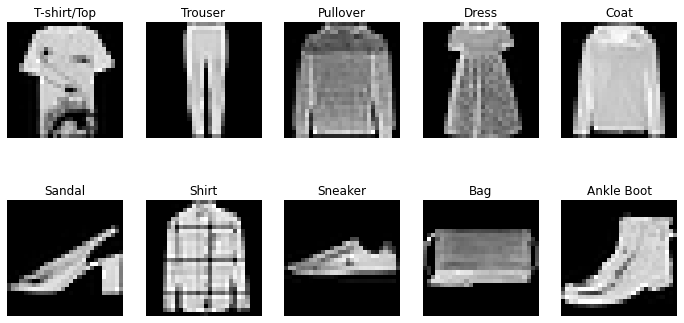

In [ ]:
wandb.init(entity="cs22m035", project="Assignment_1")
# wandb.run.name = "Q1"
show_images(train_images , train_labels , labels)
# wandb.agent(sweep_id, train)

# Ploting Confusion Matrix for best configuration

In [ ]:
optimizer=nadam
epochs=10
batch = 64
eta=0.001
alpha=0
hidden_layer_size = 128
hidden_layers = 5
strat='xavier'
act_fun ='relu'
loss_fun='cross_entropy'
hl = [hidden_layer_size]*hidden_layers
ol = [len(train_y[0])]
n_hl = len(hl)

if optimizer==stochastic_gradient_descent:
  W,b = stochastic_gradient_descent(train_x,train_y,valid_x,valid_y,d,hl,ol,act_fun,loss_fun,epochs,eta,strat,alpha,batch)

elif optimizer==momentum_gradient_descent:
  W,b = momentum_gradient_descent(train_x,train_y,valid_x,valid_y,d,hl,ol,act_fun,loss_fun,epochs,eta,strat,alpha,batch)

elif optimizer==nesterov_gradient_descent:
  W,b = nesterov_gradient_descent(train_x,train_y,valid_x,valid_y,d,hl,ol,act_fun,loss_fun,epochs,eta,strat,alpha,batch)

elif optimizer==rmsprop:
  W,b = rmsprop(train_x,train_y,valid_x,valid_y,d,hl,ol,act_fun,loss_fun,epochs,eta,strat,alpha,batch)

elif optimizer==adaptive_moments:
  W,b = adaptive_moments(train_x,train_y,valid_x,valid_y,d,hl,ol,act_fun,loss_fun,epochs,eta,strat,alpha,batch)

elif optimizer==nadam:
  W,b = nadam(train_x,train_y,valid_x,valid_y,d,hl,ol,act_fun,loss_fun,epochs,eta,strat,alpha,batch)

 
wandb.init(entity="cs22m035", project="confusion")
# wandb.run.name = "Q1"
# show_images(train_images , train_labels , labels)

train_acc, train_loss,ytrue,ypred = get_predictions_accuracy(W, b, train_x, train_y, act_fun, loss_fun)  
cmat = get_confusion_matrix(ytrue , ypred , labels , figsize=(20,20))

wandb.log({
          "Confusion_Matrix": cmat  
        })

epoch: 2  cross_entropy  train_acc : 0.8830370370370371 valid_acc : 0.8765 test_acc : 0.861
epoch: 3  cross_entropy  train_acc : 0.895425925925926 valid_acc : 0.883 test_acc : 0.8679
epoch: 4  cross_entropy  train_acc : 0.9019259259259259 valid_acc : 0.8845 test_acc : 0.8713
epoch: 5  cross_entropy  train_acc : 0.9081111111111111 valid_acc : 0.888 test_acc : 0.8764
epoch: 6  cross_entropy  train_acc : 0.91 valid_acc : 0.8868333333333334 test_acc : 0.8749
epoch: 7  cross_entropy  train_acc : 0.9125 valid_acc : 0.8871666666666667 test_acc : 0.8733
epoch: 8  cross_entropy  train_acc : 0.9152592592592592 valid_acc : 0.8836666666666667 test_acc : 0.8731
epoch: 9  cross_entropy  train_acc : 0.9235740740740741 valid_acc : 0.8885 test_acc : 0.8781
epoch: 10  cross_entropy  train_acc : 0.9169074074074074 valid_acc : 0.876 test_acc : 0.8675


Epoch,▁▂▃▃▄▅▆▆▇█
Train Acc,▁▃▅▅▆▆▇▇█▇
Train Loss,█▆▄▄▃▃▂▂▁▂
Valid Acc,▁▅▆▇███▇█▄
Valid Loss,█▄▂▂▁▂▄▅▄█
Epoch,10
Train Acc,91.69074
Train Loss,0.22367
Valid Acc,87.6
Valid Loss,0.37771
